# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 13.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 9.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 12.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 601 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.demo # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [6]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#,locations = locations)   #Use either track or locations

1321535113449082880
1321535113130332167
1321535113814020098
1321535113927294979
1321535113977569288
1321535113860161538
1321535114023706625
1321535114107621376
1321535114539532288
1321535114560626688
1321535114652897280
1321535115143442432
1321535115361734656
1321535115563061256
1321535115969859585
1321535116489986049
1321535116540321792
1321535116930215936
1321535117077041152
1321535117211230208
1321535117303578624
1321535117853184001
1321535117953814530
1321535117907628040
1321535118041821185
1321535118222254080
1321535118335500290
1321535118347956224
1321535118301974538
1321535118675247112
1321535118868172800
1321535118884937729
1321535118951940097
1321535118989791235
1321535119224655873
1321535119497318402
1321535119715405824
1321535119774126085
1321535119967031296
1321535120361332737
1321535120562683905
1321535120692662277
1321535120873082881
1321535120889815040
1321535121443479554
1321535121539932162
1321535121678311428
1321535121959251968
1321535122068439044
1321535121988689921


1321535178397933568
1321535178402074625
1321535178607677443
1321535178825555968
1321535178959773696
1321535178855112704
1321535179127689216
1321535179345842178
1321535179731685381
1321535179941388288
1321535180000153602
1321535180155179008
1321535180297756673
1321535180406951937
1321535180499079168
1321535180130062336
1321535180599816193
1321535180587388933
1321535180717391872
1321535180771909633
1321535181019209728
1321535181174591489
1321535181161959425
1321535181782687745
1321535182084648960
1321535182252527619
1321535182462177281
1321535182671929346
1321535182751477760
1321535182856474625
1321535183137378305
1321535183036829699
1321535183250739202
1321535183409967104
1321535183758217218
1321535183812587520
1321535184181862400
1321535184211267586
1321535184190275587
1321535184454492163
1321535184638894080
1321535184827723782
1321535184915890176
1321535185054216193
1321535185146552327
1321535185171742722
1321535185553367040
1321535185557618690
1321535185729540096
1321535185842831362


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [7]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [8]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [9]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Oct 28 19:39:00 +0000 2020'
'Wed Oct 28 19:38:46 +0000 2020'
'Wed Oct 28 19:33:42 +0000 2020'
'Wed Oct 28 19:33:36 +0000 2020'
'Wed Oct 28 19:30:16 +0000 2020'
'Wed Oct 28 19:28:48 +0000 2020'
'Wed Oct 28 19:27:08 +0000 2020'
'Wed Oct 28 19:23:41 +0000 2020'
'Wed Oct 28 19:23:18 +0000 2020'
'Wed Oct 28 19:22:55 +0000 2020'
'Wed Oct 28 19:22:27 +0000 2020'
'Wed Oct 28 19:21:46 +0000 2020'
'Wed Oct 28 19:20:36 +0000 2020'
'Wed Oct 28 19:19:16 +0000 2020'
'Wed Oct 28 19:18:32 +0000 2020'
'Wed Oct 28 19:17:33 +0000 2020'
'Wed Oct 28 19:17:06 +0000 2020'
'Wed Oct 28 19:17:00 +0000 2020'
'Wed Oct 28 19:15:24 +0000 2020'
'Wed Oct 28 19:14:36 +0000 2020'
'Wed Oct 28 19:13:41 +0000 2020'
'Wed Oct 28 19:13:36 +0000 2020'
'Wed Oct 28 19:12:53 +0000 2020'
'Wed Oct 28 19:12:04 +0000 2020'
'Wed Oct 28 19:11:24 +0000 2020'
'Wed Oct 28 19:07:56 +0000 2020'
'Wed Oct 28 19:06:31 +0000 2020'
'Wed Oct 28 19:06:00 +0000 2020'
'Wed Oct 28 19:03:54 +0000 2020'
'Wed Oct 28 19:03:51 +0000 2020'


Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [10]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Oct 28 19:03:25 +0000 2020'
'Wed Oct 28 19:02:54 +0000 2020'
'Wed Oct 28 19:02:24 +0000 2020'
'Wed Oct 28 19:02:02 +0000 2020'
'Wed Oct 28 19:01:07 +0000 2020'
'Wed Oct 28 19:00:59 +0000 2020'
'Wed Oct 28 19:00:56 +0000 2020'
'Wed Oct 28 19:00:35 +0000 2020'
'Wed Oct 28 19:00:26 +0000 2020'
'Wed Oct 28 18:59:53 +0000 2020'
'Wed Oct 28 18:58:59 +0000 2020'
'Wed Oct 28 18:56:29 +0000 2020'
'Wed Oct 28 18:56:26 +0000 2020'
'Wed Oct 28 18:55:35 +0000 2020'
'Wed Oct 28 18:54:39 +0000 2020'
'Wed Oct 28 18:54:37 +0000 2020'
'Wed Oct 28 18:54:15 +0000 2020'
'Wed Oct 28 18:53:37 +0000 2020'
'Wed Oct 28 18:53:32 +0000 2020'
'Wed Oct 28 18:53:22 +0000 2020'
'Wed Oct 28 18:52:52 +0000 2020'
'Wed Oct 28 18:52:07 +0000 2020'
'Wed Oct 28 18:51:33 +0000 2020'
'Wed Oct 28 18:50:30 +0000 2020'
'Wed Oct 28 18:50:16 +0000 2020'
'Wed Oct 28 18:49:25 +0000 2020'
'Wed Oct 28 18:47:22 +0000 2020'
'Wed Oct 28 18:47:20 +0000 2020'
'Wed Oct 28 18:47:14 +0000 2020'
'Wed Oct 28 18:47:00 +0000 2020'
'Wed Oct 2

'Wed Oct 28 14:57:02 +0000 2020'
'Wed Oct 28 14:56:35 +0000 2020'
'Wed Oct 28 14:55:53 +0000 2020'
'Wed Oct 28 14:55:36 +0000 2020'
'Wed Oct 28 14:55:16 +0000 2020'
'Wed Oct 28 14:54:19 +0000 2020'
'Wed Oct 28 14:53:48 +0000 2020'
'Wed Oct 28 14:52:44 +0000 2020'
'Wed Oct 28 14:52:08 +0000 2020'
'Wed Oct 28 14:52:05 +0000 2020'
'Wed Oct 28 14:50:39 +0000 2020'
'Wed Oct 28 14:50:22 +0000 2020'
'Wed Oct 28 14:50:05 +0000 2020'
'Wed Oct 28 14:49:53 +0000 2020'
'Wed Oct 28 14:49:37 +0000 2020'
'Wed Oct 28 14:49:16 +0000 2020'
'Wed Oct 28 14:48:53 +0000 2020'
'Wed Oct 28 14:46:44 +0000 2020'
'Wed Oct 28 14:46:37 +0000 2020'
'Wed Oct 28 14:46:33 +0000 2020'
'Wed Oct 28 14:46:32 +0000 2020'
'Wed Oct 28 14:46:01 +0000 2020'
'Wed Oct 28 14:45:49 +0000 2020'
'Wed Oct 28 14:45:33 +0000 2020'
'Wed Oct 28 14:45:21 +0000 2020'
'Wed Oct 28 14:43:51 +0000 2020'
'Wed Oct 28 14:42:21 +0000 2020'
'Wed Oct 28 14:41:41 +0000 2020'
'Wed Oct 28 14:41:26 +0000 2020'
'Wed Oct 28 14:39:00 +0000 2020'
'Wed Oct 2

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [14]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

1949
1844


Create a text index and print the Tweets containing specific keywords. 

In [15]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [22]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [24]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document   
        
         
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Aamani P | ఆమని | WEAR A MASK
text: Have you voted? If not, Election Day is 6 days away. Vote instead of regretting not voting.
----
name: mark
text: RT @Mia4MD: Early Voting is happening NOW in Maryland for the 2020 Presidential Election. You can vote in an early voting center in the cou…
----
name: megaminimalist
text: RT @Amy_Siskind: TEXAS‼️ - an astounding 7.8 million Texans have voted!  That’s 88% of all the 2016 votes. 

There is little mail-in voting…
----
name: Virginians4U
text: KEEP Pres: TRUMP
CHANGE Senate: GADE
HOPE Congress GOOD or FREITAS or TAYLOR or BENJAMIN or ANDREWS 
VOTE VOTE VOTE… https://t.co/2ZjF6E0Blv
----
name: Antonio Licon
text: #VOTE
----
name: jtevans
text: #Vote
----
name: Patriot Girl 2020🎃🎃🎃🎃
text: Damn... selling votes. Buying votes.

Voter fraud is real!
----
name: Robert BOO-Lane ... er, Dahlen
text: RT @powrdragn: If you haven't voted you should now be voted at the polls or at dropboxes. No other options are guaranteed to work now in so…

In [25]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [26]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,timestamp_ms,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,metadata,display_text_range
0,5f99c72efb664ea47e56fc08,Wed Oct 28 19:31:53 +0000 2020,1321535174555897856,1321535174555897856,"Have you voted? If not, Election Day is 6 days...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1603913513207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f9970e6ea281243abe9e85f,Wed Oct 28 13:23:45 +0000 2020,1321442530572066817,1321442530572066817,RT @Mia4MD: Early Voting is happening NOW in M...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1603891425160,{'created_at': 'Wed Oct 28 12:46:04 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f9970eaea281243abe9e8c9,Wed Oct 28 13:23:49 +0000 2020,1321442549718945792,1321442549718945792,RT @Amy_Siskind: TEXAS‼️ - an astounding 7.8 m...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1603891429725,{'created_at': 'Tue Oct 27 13:00:53 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5f9970efea281243abe9e939,Wed Oct 28 13:23:54 +0000 2020,1321442568459198467,1321442568459198467,KEEP Pres: TRUMP\nCHANGE Senate: GADE\nHOPE Co...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,...,1603891434193,NaN,1.321379e+18,1321378894327484416,{'created_at': 'Wed Oct 28 09:10:53 +0000 2020...,"{'url': 'https://t.co/g07jyouj2s', 'expanded':...",{'full_text': 'KEEP Pres: TRUMP CHANGE Senate:...,NaN,NaN,NaN
4,5f997133ea281243abe9ea5a,Wed Oct 28 13:25:02 +0000 2020,1321442853244018690,1321442853244018690,#VOTE,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1603891502091,NaN,1.321441e+18,1321440905098874882,{'created_at': 'Wed Oct 28 13:17:17 +0000 2020...,"{'url': 'https://t.co/SiYtZzvyXq', 'expanded':...",NaN,NaN,NaN,NaN
5,5f9970e6ea281243abe9e868,Wed Oct 28 13:23:45 +0000 2020,1321442531532435457,1321442531532435457,#Vote,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1603891425389,NaN,1.321180e+18,1321179867052986368,{'created_at': 'Tue Oct 27 20:00:01 +0000 2020...,"{'url': 'https://t.co/VhdpN9qfYf', 'expanded':...",NaN,NaN,NaN,NaN
6,5f99c72bfb664ea47e56fbc4,Wed Oct 28 19:31:50 +0000 2020,1321535162820268033,1321535162820268033,Damn... selling votes. Buying votes.\n\nVoter ...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1603913510409,NaN,1.321529e+18,1321529367697252353,{'created_at': 'Wed Oct 28 19:08:48 +0000 2020...,"{'url': 'https://t.co/zTr0qmGFv0', 'expanded':...",NaN,NaN,NaN,NaN
7,5f99c727fb664ea47e56fb4e,Wed Oct 28 19:31:46 +0000 2020,1321535146525249536,1321535146525249536,RT @powrdragn: If you haven't voted you should...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1603913506524,{'created_at': 'Wed Oct 28 16:55:51 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5f99c726fb664ea47e56fb38,Wed Oct 28 19:31:45 +0000 2020,1321535142704357376,1321535142704357376,RT @KellyMcCreary: November 3rd isn’t the only...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1603913505613,{'created_at': 'Tue Oct 27 17:11:24 +0000 2020...,1.321074e+18,1321073943558631425,{'created_at': 'Tue Oct 27 12:59:07 +0000 2020...,"{'url': 'https://t.co/NTrlIfL7kZ', 'expanded':...",NaN,NaN,NaN,NaN
9,5f9970f5ea281243abe9e9b4,Wed Oct 28 13:24:00 +0000 2020,1321442594174455809,1321442594174455809,RT @grantstern: Why is ⁦@MayorGimenez⁩ against...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1603891440324,{'created_at': 'Wed Oct 28 12:07:13 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


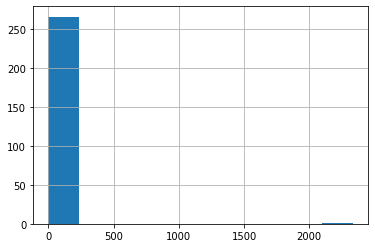

In [27]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count